In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV,TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
pd.set_option('mode.chained_assignment', None)

In [0]:
train = pd.read_csv("train.csv",parse_dates=['application_date'])
test  = pd.read_csv("test.csv",parse_dates=['application_date'])

In [438]:
train.count()

application_date    80402
segment             80402
branch_id           66898
state               80402
zone                66898
case_count          80402
dtype: int64

In [0]:
df1 = train[train['segment'] == 1]

In [0]:
df2 = train[train['segment'] == 2]

In [441]:
df2.head()

,application_date,segment,branch_id,state,zone,case_count
66898,2017-04-01,2,NaN,ASSAM,NaN,0.0
66899,2017-04-02,2,NaN,ASSAM,NaN,0.0
66900,2017-04-03,2,NaN,ASSAM,NaN,0.0
66901,2017-04-04,2,NaN,ASSAM,NaN,0.0
66902,2017-04-05,2,NaN,ASSAM,NaN,0.0


In [0]:
df2.drop(df2[df2['state'] == 'HARYANA'].index,inplace = True)
df2.drop(df2[df2['state'] == 'PUNJAB'].index,inplace = True)

In [443]:
df2.groupby('state')['case_count'].sum()

state
ASSAM              645014.0
BIHAR             1311778.0
CHHATTISGARH       295944.0
GUJARAT            292448.0
JHARKHAND          133834.0
KARNATAKA         1550133.0
KERALA             808907.0
MADHYA PRADESH     541299.0
MAHARASHTRA        287218.0
ORISSA            1245940.0
TAMIL NADU        3990073.0
TRIPURA            149839.0
UTTAR PRADESH      259056.0
WEST BENGAL       1213588.0
Name: case_count, dtype: float64

In [0]:
train=df1.append(df2)

In [445]:
train.count()

application_date    78714
segment             78714
branch_id           66898
state               78714
zone                66898
case_count          78714
dtype: int64

In [446]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [0]:
Submission = test[['id','application_date','segment']]
test.drop('id',axis=1,inplace=True)

In [0]:
df_train = train.copy()
df_test = test.copy()

Text(0, 0.5, 'Count')

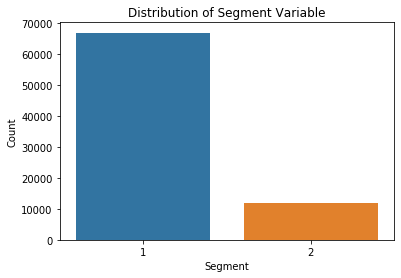

In [449]:
sns.countplot(train['segment'],order=train['segment'].value_counts().index)
plt.title("Distribution of Segment Variable")
plt.xlabel("Segment")
plt.ylabel("Count")
# Lot more values of Segment1 than Segment2

In [450]:
train['case_count'].describe()

count    78714.000000
mean       189.459448
std        757.100377
min          0.000000
25%          0.000000
50%         18.000000
75%         62.000000
max      13787.000000
Name: case_count, dtype: float64

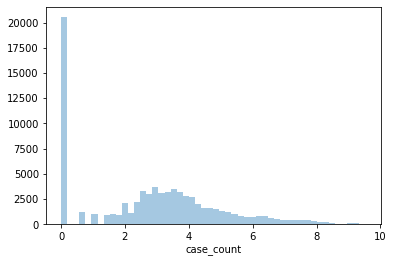

In [451]:
sns.distplot(np.log1p(train['case_count']),kde=False,bins=50)

In [452]:
train.groupby('segment')['case_count'].agg(['min','max','mean','median','std'])

,min,max,mean,median,std
segment,,,,,
1,0.0,1890.0,32.707106,14.0,61.591868
2,0.0,13787.0,1076.935596,477.0,1694.240438


In [453]:
train.groupby('state')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')

,count,min,max,mean,median,std,sum
state,,,,,,,
DELHI,806,0.0,1488.0,168.486352,136.0,148.757794,135800.0
UTTARAKHAND,1612,0.0,383.0,24.782258,20.0,27.525605,39949.0
TELANGANA,1612,0.0,1038.0,56.153226,0.0,88.913544,90519.0
KERALA,1650,0.0,3369.0,496.008485,39.5,722.016808,818414.0
CHHATTISGARH,1650,0.0,1111.0,181.298788,22.5,241.012685,299143.0
MADHYA PRADESH,1650,0.0,2350.0,348.672121,87.0,455.859267,575309.0
TRIPURA,2456,0.0,997.0,82.313111,32.0,142.665541,202161.0
JHARKHAND,2456,0.0,833.0,69.036645,20.0,137.794878,169554.0
HARYANA,3224,0.0,118.0,3.736973,0.0,8.305876,12048.0


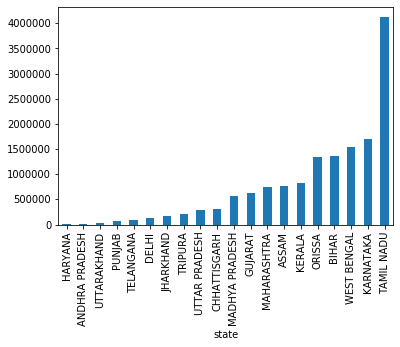

In [454]:
train.groupby('state')['case_count'].sum().sort_values().plot(kind='bar')

In [455]:
train.groupby('zone')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')

,count,min,max,mean,median,std,sum
zone,,,,,,,
CENTRAL,1612,0.0,609.0,23.082506,11.0,36.657118,37209.0
NORTH,8060,0.0,1488.0,27.383002,6.0,69.671582,220707.0
WEST,16926,0.0,1890.0,46.985053,23.0,77.373460,795269.0
SOUTH,18538,0.0,1143.0,26.973784,8.0,54.089844,500040.0
EAST,21762,0.0,1657.0,29.170802,16.0,48.989433,634815.0


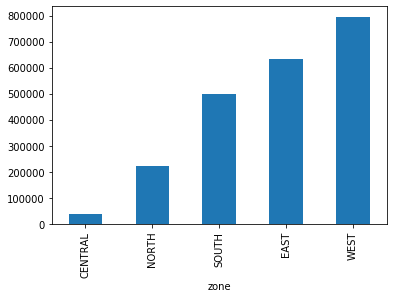

In [456]:
train.groupby('zone')['case_count'].sum().sort_values().plot(kind='bar')

In [0]:
train['year'] = train.application_date.dt.year
train['month'] = train.application_date.dt.month
train['dayofweek'] = train.application_date.dt.dayofweek
train['day'] = train.application_date.dt.day
train['quarter'] = train.application_date.dt.quarter
train['is_month_start'] = train.application_date.dt.is_month_start
train['is_month_end'] = train.application_date.dt.is_month_end
train['is_quarter_start'] = train.application_date.dt.is_quarter_start
train['is_quarter_end'] = train.application_date.dt.is_quarter_end

In [458]:
train.head()

,application_date,segment,branch_id,state,zone,case_count,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,5,1,2,True,False,True,False
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,0,3,2,False,False,False,False
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,1,4,2,False,False,False,False
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,2,5,2,False,False,False,False
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,4,7,2,False,False,False,False


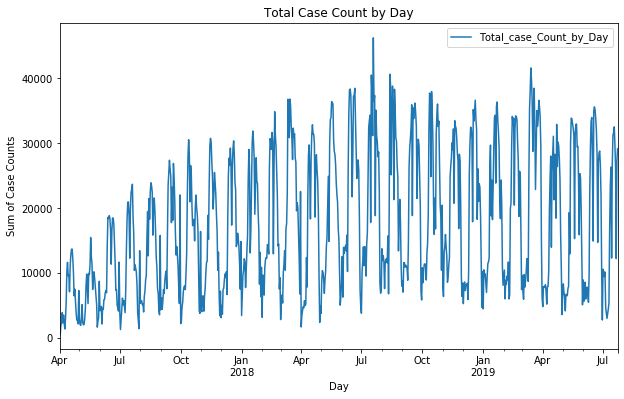

In [459]:
train.set_index('application_date').resample('D')['case_count'].sum().plot(kind='line',figsize=(10,6),label='Total_case_Count_by_Day')
plt.title("Total Case Count by Day")
plt.xlabel('Day')
plt.ylabel("Sum of Case Counts")
plt.legend(loc='best')

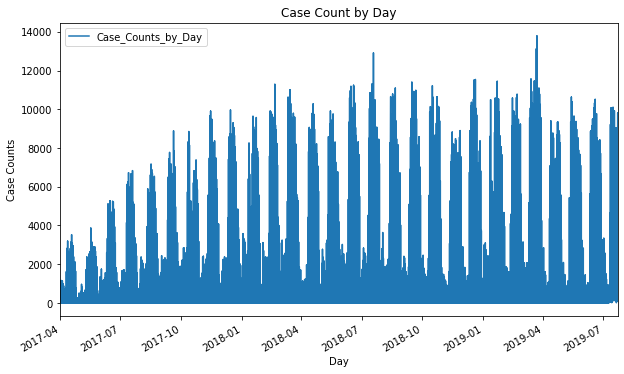

In [460]:
train.set_index('application_date')['case_count'].plot(kind='line',figsize=(10,6),label='Case_Counts_by_Day')
plt.title("Case Count by Day")
plt.xlabel('Day')
plt.ylabel("Case Counts")
plt.legend(loc='best')
# We can see increasing and decreasing trends here

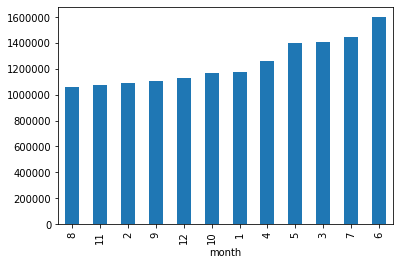

In [461]:
train.groupby('month')['case_count'].sum().sort_values().plot(kind='bar')

In [462]:
train.groupby('dayofweek')['case_count'].agg(['count','min','max','sum','mean']).sort_values(by='count')


,count,min,max,sum,mean
dayofweek,,,,,
6,10907,0.0,10250.0,1436647.0,131.717888
5,11156,0.0,13787.0,2135403.0,191.412962
2,11308,0.0,11160.0,2314316.0,204.661832
4,11308,0.0,13118.0,2262137.0,200.047489
0,11322,0.0,10805.0,2173422.0,191.964494
1,11322,0.0,11506.0,2280995.0,201.465730
3,11391,0.0,12908.0,2310191.0,202.808445


In [463]:
train.groupby(['year','quarter'])['case_count'].agg(['count','min','max','sum','mean'])

count  min      max        sum        mean
year quarter                                            
2017 2         8246  0.0   5274.0   706232.0   85.645404
     3         8177  0.0   8884.0  1197941.0  146.501284
     4         8924  0.0   9963.0  1449814.0  162.462349
2018 1         8398  0.0  11288.0  1728408.0  205.811860
     2         8827  0.0  11241.0  1812629.0  205.350515
     3         8924  0.0  12908.0  2027253.0  227.168646
     4         8924  0.0  11536.0  1919816.0  215.129538
2019 1         8730  0.0  13787.0  1944961.0  222.790493
     2         8827  0.0  10629.0  1734401.0  196.488161
     3          737  0.0  10099.0   391656.0  531.419267

In [0]:
test['year'] = test.application_date.dt.year
test['month'] = test.application_date.dt.month
test['dayofweek'] = test.application_date.dt.dayofweek
test['day'] = test.application_date.dt.day
test['quarter'] = test.application_date.dt.quarter
test['is_month_start'] = test.application_date.dt.is_month_start
test['is_month_end'] = test.application_date.dt.is_month_end
test['is_quarter_start'] = test.application_date.dt.is_quarter_start
test['is_quarter_end'] = test.application_date.dt.is_quarter_end


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_pred)) * 100

In [0]:
df_train.drop(['branch_id','state','zone'],axis=1,inplace=True)

In [467]:
df_train = df_train.groupby(['application_date','segment'],as_index=False)['case_count'].sum()
df_train.head()

,application_date,segment,case_count
0,2017-04-01,1,299.0
1,2017-04-01,2,897.0
2,2017-04-02,2,605.0
3,2017-04-03,1,42.0
4,2017-04-03,2,2016.0


In [0]:
holidays = ['2017-04-05','2017-04-09','2017-04-14','2017-05-01',
       '2017-05-10', '2017-06-25', '2017-06-26', '2017-08-07',
       '2017-08-14', '2017-08-15', '2017-08-25', '2017-09-02',
       '2017-09-04', '2017-09-30', '2017-10-01', '2017-10-02',
       '2017-10-19', '2017-12-01', '2017-12-25', '2018-01-01', 
       '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-04-19',
       '2019-04-21', '2019-05-09', '2019-05-18', '2019-05-31',
       '2019-06-05', '2019-07-04', '2019-08-12', '2019-08-15',
       '2019-08-17', '2019-08-24', '2019-09-02', '2019-09-10',
       '2019-09-11', '2019-10-02', '2019-10-05', '2019-10-06',
       '2019-10-07', '2019-10-08', '2019-10-13', '2019-10-17',
       '2019-10-27', '2019-10-28', '2019-10-29', '2019-11-02',
       '2019-11-10', '2019-11-12', '2019-11-24', '2019-12-24',
       '2019-12-25']
df_train['Holiday'] = (df_train.application_date.dt.date.astype("str").isin(holidays)).astype(int)
df_test['Holiday'] = (df_test.application_date.dt.date.astype("str").isin(holidays)).astype(int)

In [469]:
df_train.head(30)

,application_date,segment,case_count,Holiday
0,2017-04-01,1,299.0,0
1,2017-04-01,2,897.0,0
2,2017-04-02,2,605.0,0
3,2017-04-03,1,42.0,0
4,2017-04-03,2,2016.0,0
5,2017-04-04,1,23.0,0
6,2017-04-04,2,2245.0,0
7,2017-04-05,1,1530.0,1
8,2017-04-05,2,2415.0,1
9,2017-04-06,2,2379.0,0


In [470]:
df_test.head()

,application_date,segment,Holiday
0,2019-07-06,1,0
1,2019-07-07,1,0
2,2019-07-08,1,0
3,2019-07-09,1,0
4,2019-07-10,1,0


In [0]:
df = df_train[df_train['segment'] == 1]

In [472]:
df.head()

,application_date,segment,case_count,Holiday
0,2017-04-01,1,299.0,0
3,2017-04-03,1,42.0,0
5,2017-04-04,1,23.0,0
7,2017-04-05,1,1530.0,1
10,2017-04-07,1,1341.0,0


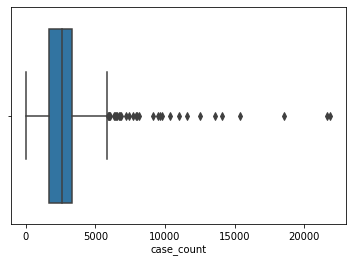

In [473]:
import seaborn as sns
sns.boxplot(x=df['case_count'])

In [0]:
df=df[df['case_count'] < 4000]

In [0]:
def weekend_indicator(x):
    if (x>4 and x<=6):
        return True
    else:
        return False

In [0]:
df['year'] = df.application_date.dt.year
df['month'] = df.application_date.dt.month
df['dayofweek'] = df.application_date.dt.dayofweek
df['day'] = df.application_date.dt.day
df['quarter'] = df.application_date.dt.quarter
df['is_month_start'] = df.application_date.dt.is_month_start
df['is_month_end'] = df.application_date.dt.is_month_end
df['is_quarter_start'] = df.application_date.dt.is_quarter_start
df['is_quarter_end'] = df.application_date.dt.is_quarter_end
df['weekend'] = df['dayofweek'].apply(weekend_indicator)

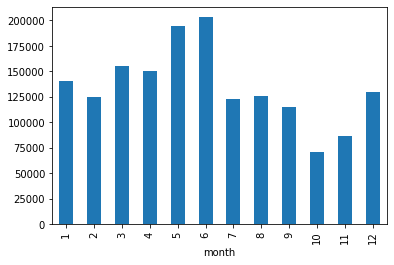

In [477]:
df.groupby('month')['case_count'].sum().plot(kind='bar')

In [0]:
cols = ['year','month','dayofweek','day','quarter']
for col in cols:
    df_train[col] = df[col].astype('category')

In [0]:
y = df['case_count']
X = df[[col for col in df.columns if col not in ['application_date','segment','case_count']]]

In [0]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.25,shuffle=False,random_state=42)

In [481]:
model = RandomForestRegressor(n_jobs=1, random_state=42)
params = {"n_estimators":list(range(10,500,45)),
          "max_features":[0.5,'sqrt','log2','auto'],
          "max_depth":[3,4,5,6,7],
          "min_samples_leaf":[2,3,5,7,10],
          "min_samples_split":[2, 5, 10]          
          }
search = RandomizedSearchCV(estimator=model,param_distributions=params,cv=7,random_state=42)
search.fit(X,y)

RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=1,
                    

In [482]:
y_pred = search.best_estimator_.predict(X_Test)
mape_segment_1 = mean_absolute_percentage_error(y_Test,y_pred)
print (mape_segment_1)
print(search.best_params_)


12.48480152869947
{'n_estimators': 280, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 7}


In [0]:
df_test['year'] = df_test.application_date.dt.year
df_test['month'] = df_test.application_date.dt.month
df_test['dayofweek'] = df_test.application_date.dt.dayofweek
df_test['day'] = df_test.application_date.dt.day
df_test['quarter'] = df_test.application_date.dt.quarter
df_test['is_month_start'] = df_test.application_date.dt.is_month_start
df_test['is_month_end'] = df_test.application_date.dt.is_month_end
df_test['is_quarter_start'] = df_test.application_date.dt.is_quarter_start
df_test['is_quarter_end'] = df_test.application_date.dt.is_quarter_end
df_test['weekend'] = df_test['dayofweek'].apply(weekend_indicator)


for col in cols:
    df_train[col] = df[col].astype('category')

df_test_segment1 = df_test[df_test['segment'] == 1]
df_test_segment1.drop(['application_date','segment'],axis=1,inplace=True)

In [0]:
Submission.loc[Submission['segment'] == 1,'case_count'] = search.best_estimator_.predict(df_test_segment1)

In [0]:
df = df_train[df_train['segment'] == 2]

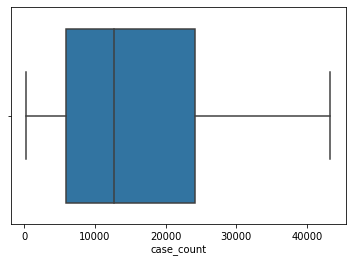

In [486]:
import seaborn as sns
sns.boxplot(x=df['case_count'])

In [0]:
df['year'] = df.application_date.dt.year
df['month'] = df.application_date.dt.month
df['dayofweek'] = df.application_date.dt.dayofweek
df['day'] = df.application_date.dt.day
df['quarter'] = df.application_date.dt.quarter
df['is_month_start'] = df.application_date.dt.is_month_start
df['is_month_end'] = df.application_date.dt.is_month_end
df['is_quarter_start'] = df.application_date.dt.is_quarter_start
df['is_quarter_end'] = df.application_date.dt.is_quarter_end
df['weekend'] = df['dayofweek'].apply(weekend_indicator)


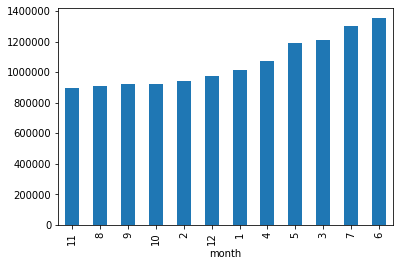

In [488]:
df.groupby('month')['case_count'].sum().sort_values().plot(kind='bar')

In [0]:
cols = ['year','month','dayofweek','day','quarter']
for col in cols:
    df_train[col] = df[col].astype('category')

In [0]:
y = df['case_count']
X = df[[col for col in df.columns if col not in ['application_date','segment','case_count']]]

In [0]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.25,shuffle=False,random_state=42)

In [492]:
X_Train.head()

,Holiday,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,weekend
1,0,2017,4,5,1,2,True,False,True,False,True
2,0,2017,4,6,2,2,False,False,False,False,True
4,0,2017,4,0,3,2,False,False,False,False,False
6,0,2017,4,1,4,2,False,False,False,False,False
8,1,2017,4,2,5,2,False,False,False,False,False


In [0]:
model = RandomForestRegressor(n_jobs=1, random_state=42)
params = {"n_estimators":list(range(10,500,30)),
          "max_features":[0.3,'sqrt','log2','auto'],
          "max_depth":[3,4,5,6,7],
          "min_samples_leaf":[2,3,5,7,10]                 
          }
search = RandomizedSearchCV(estimator=model,param_distributions=params,cv=7,random_state=42)


In [494]:
search.fit(X,y)

RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=1,
                    

In [495]:
y_pred = search.best_estimator_.predict(X_Test)
mape_segment_2 = mean_absolute_percentage_error(y_Test,y_pred)
print (mape_segment_2)
print (search.best_params_)

13.656768175016298
{'n_estimators': 190, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 7}


In [496]:
ser = pd.Series(search.best_estimator_.feature_importances_,X.columns).sort_values()
ser

is_quarter_end      5.640554e-07
is_quarter_start    1.747138e-04
is_month_start      3.109101e-04
weekend             8.995960e-04
is_month_end        3.270531e-03
Holiday             3.894072e-03
quarter             1.335588e-02
month               5.073706e-02
dayofweek           5.088593e-02
year                1.574624e-01
day                 7.190084e-01
dtype: float64

In [497]:
final_mape = 0.5*mape_segment_1+0.5*mape_segment_2
print (final_mape)

13.070784851857884


In [0]:
df_test_segment2 = df_test[df_test['segment'] == 2]
df_test_segment2.drop(['application_date','segment'],axis=1,inplace=True)

In [0]:
Submission.loc[Submission['segment'] == 2,'case_count'] = search.best_estimator_.predict(df_test_segment2)

In [0]:
Submission['case_count'] = Submission['case_count'].astype(int)

In [0]:
Submission.to_csv("Submission11.csv",index=None)